In [1]:
import pandas as pd
import sys
import os
from utils import mkdir_no_exist

from nilearn.glm.first_level import make_first_level_design_matrix, FirstLevelModel
from nilearn.plotting import plot_design_matrix

from matplotlib import pyplot as plt

In [2]:
# ACCESS DIRECTORIES #

current_dir = os.path.abspath("")
print(f"current_dir: {current_dir}")
sys.path.append(current_dir)

dataset_id = 'ds000171'
subjects = ['sub-control{:02d}'.format(i+1) for i in range(20)]

dataset_path = os.path.join(current_dir, "data", dataset_id)
deriv_path = os.path.join(current_dir,"data", "derivatives")
preproc_path = os.path.join(deriv_path, 'preprocessed_data')

mkdir_no_exist(dataset_path)
mkdir_no_exist(preproc_path)


current_dir: /data


In [3]:
# READ AND CONCAT EVENTS #

events = {}
for i in range(1,4):
    events[i] = pd.read_csv(os.path.join(dataset_path,subjects[0],"func","sub-control01_task-music_run-2_events.tsv"), sep = "\t")
    if i>1: #adjust onset time for concatenation
        events[i]['onset'] += (events[i-1]['onset'].iloc[-1] + events[i-1]['duration'].iloc[-1])
        
# for key, event in events.items():
#     display(f"EVENT #{key}\n",event)
events_concat = pd.concat(events.values(),ignore_index=True)
display(events_concat)



,onset,duration,trial_type
0,0.0,33.0,tones
1,33.0,3.0,response
2,36.0,31.5,positive_music
3,67.5,3.0,response
4,70.5,31.5,tones
5,102.0,3.0,response
6,105.0,31.5,negative_music
7,136.5,3.0,response
8,139.5,31.5,tones
9,171.0,3.0,response


In [4]:
from nilearn.datasets import fetch_spm_auditory
subject_data = fetch_spm_auditory()

from nilearn.image import concat_imgs, mean_img
fmri_img = concat_imgs(subject_data.func)

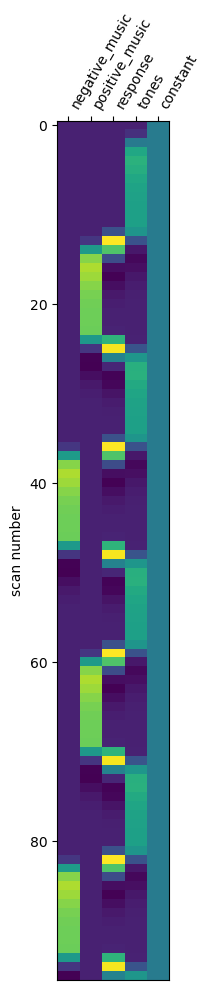

In [5]:
fmri_glm = FirstLevelModel(t_r=3, # see task-music_bold.json
                           noise_model='ar1',
                           standardize=False,
                           hrf_model='spm',
                           drift_model=None,
                           high_pass=.01)

# Fit the model to our design and data
fmri_glm = fmri_glm.fit(fmri_img, events_concat)

plot_design_matrix(fmri_glm.design_matrices_[0])
plt.show()